In [1]:
from kmodes.kprototypes import KPrototypes
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r'C:\Users\Anna\Desktop\MSD_finalfirstset.csv')
df.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Artist,Name
0,0.063000,0.751,218933,0.549,01TR6aAKrA2cI3Z0gnCOsu,0.000025,6,0.1060,-10.508,0.0,0.4290,92.224,4,0.553,Casual,I Didn't Mean To
1,0.195000,0.749,147760,0.530,4yPl1mK1oluIrCwI4HInPR,0.000035,9,0.0748,-12.940,1.0,0.0326,121.395,4,0.966,The Box Tops,Soul Deep
2,0.689000,0.699,183027,0.519,5JeyXbf7CrVQ8DqwFikN0P,0.000471,8,0.9350,-6.422,1.0,0.0290,102.463,4,0.676,La Sonora Santanera,Amor de Cabaret (with Río Roma)
3,0.197000,0.596,232107,0.934,1BddSZ9x0Vi2WfZOSna47Z,0.007410,0,0.1840,-3.812,1.0,0.0459,120.055,4,0.843,Adam Ant,Something Girls
4,0.000356,0.525,209600,0.918,4cdbM6efK43Cs2PDMtzdhv,0.566000,2,0.0904,-4.512,1.0,0.0543,129.727,4,0.655,Gob,Face the Ashes


In [3]:
new_loudness = []
maxi = df.loudness.max()
mini = df.loudness.min()
for row in range(len(df.index)):
    new= (df.loudness[row]-mini)/(maxi-mini)
    new_loudness.append(new)
df['loudness']=new_loudness

new_tempo = []
maxi = df.tempo.max()
mini = df.tempo.min()
for row in range(len(df.index)):
    new= (df.tempo[row]-mini)/(maxi-mini)
    new_tempo.append(new)
df['tempo']=new_tempo

new_duration = []
maxi = df.duration_ms.max()
mini = df.duration_ms.min()
for row in range(len(df.index)):
    new= (df.duration_ms[row]-mini)/(maxi-mini)
    new_duration.append(new)
df['duration_ms']=new_duration

df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000
mean,0.309816,0.543034,0.082977,0.617690,0.213626,5.298461,0.216449,0.757215,0.682485,0.088722,0.489985,3.887619,0.512493
std,0.339050,0.182462,0.040489,0.258185,0.339677,3.535764,0.195472,0.087183,0.465526,0.117046,0.121250,0.456282,0.265878
min,0.000000,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009567,0.416000,0.060767,0.426000,0.000002,2.000000,0.095175,0.713124,0.000000,0.035200,0.398124,4.000000,0.299000
50%,0.148000,0.555000,0.076746,0.652000,0.001160,5.000000,0.133000,0.775092,1.000000,0.048200,0.487824,4.000000,0.516000
75%,0.609000,0.680000,0.096615,0.842000,0.373000,9.000000,0.280000,0.819487,1.000000,0.084100,0.561290,4.000000,0.734000
max,0.996000,0.984000,1.000000,1.000000,0.997000,11.000000,0.997000,1.000000,1.000000,0.963000,1.000000,5.000000,1.000000


In [4]:
df['key']=df['key'].astype('category')
df['mode']=df['mode'].astype('category')
df['time_signature']=df['time_signature'].astype('category')
df.dtypes

acousticness         float64
danceability         float64
duration_ms          float64
energy               float64
id                    object
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
mode                category
speechiness          float64
tempo                float64
time_signature      category
valence              float64
Artist                object
Name                  object
dtype: object

In [9]:
import time

start_time = time.time()
kproto = KPrototypes(n_clusters=3,init='random')
kproto.fit(df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
df.loc[:,'labels'] = kproto.labels_
print(kproto.cluster_centroids_)
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

[array([[0.7704006 , 0.49719348, 0.07583582, 0.32890061, 0.18976883,
        0.20782646, 0.08653775, 0.41775961],
       [0.12698378, 0.56820885, 0.08022353, 0.73938343, 0.02858013,
        0.22416716, 0.09519978, 0.59248354],
       [0.12948748, 0.54110842, 0.10168552, 0.71066359, 0.77692278,
        0.20759459, 0.07359977, 0.42887495]]), array([[0., 1., 4.],
       [9., 1., 4.],
       [7., 1., 4.]])]
Elapsed time was 68.3553 seconds


In [6]:
import time

start_time = time.time()
kproto = KPrototypes(n_clusters=50,init='random')
kproto.fit(df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
df.loc[:,'labels'] = kproto.labels_
print(kproto.cluster_centroids_)
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

[array([[2.61287607e-02, 3.85805310e-01, 8.30083487e-02, 8.83917404e-01,
        5.10857586e-02, 2.16216224e-01, 1.08940118e-01, 2.77635693e-01],
       [2.41329225e-02, 3.06680769e-01, 9.27037502e-02, 9.01139423e-01,
        7.56937500e-01, 2.33587981e-01, 1.06166827e-01, 1.74193750e-01],
       [6.44126761e-01, 6.15070423e-01, 7.10174378e-02, 6.09711268e-01,
        7.68204225e-01, 1.65907746e-01, 5.92838028e-02, 7.68739437e-01],
       [8.53642512e-01, 3.31772947e-01, 9.61670466e-02, 1.91010575e-01,
        8.34888889e-01, 1.65169082e-01, 5.04932367e-02, 1.52695169e-01],
       [6.39339901e-01, 6.32864532e-01, 6.55846797e-02, 6.32534483e-01,
        1.87516429e-02, 1.96452956e-01, 7.88270936e-02, 8.31714286e-01],
       [3.93851561e-02, 6.86937824e-01, 1.27399848e-01, 7.05253886e-01,
        8.36481865e-01, 1.56095855e-01, 6.92989637e-02, 2.55331606e-01],
       [8.89034965e-01, 5.84926573e-01, 6.16910762e-02, 2.30456224e-01,
        2.40901136e-02, 1.50691259e-01, 7.13167832e-02, 5

In [7]:
start_time = time.time()
kproto = KPrototypes(n_clusters=80,init='random')
kproto.fit(df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
df.loc[:,'labels'] = kproto.labels_
print(kproto.cluster_centroids_)
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

[array([[1.13006170e-01, 5.42576577e-01, 1.03862235e-01, 7.97189189e-01,
        7.67450450e-01, 7.21144144e-01, 7.14540541e-02, 5.26630631e-01],
       [1.51410732e-01, 6.11873874e-01, 7.92916103e-02, 7.09522523e-01,
        2.76066275e-02, 1.86607207e-01, 6.77540541e-02, 6.86666667e-01],
       [9.98281563e-02, 6.92100840e-01, 8.03065741e-02, 7.29336134e-01,
        1.24847319e-02, 1.85152101e-01, 1.29578151e-01, 7.54546218e-01],
       [8.68457286e-01, 3.76475377e-01, 9.19304382e-02, 1.93680950e-01,
        8.42537688e-01, 1.43921106e-01, 5.02778894e-02, 1.87466834e-01],
       [8.11390625e-01, 5.19359375e-01, 6.09836752e-02, 6.79687500e-01,
        1.14093281e-04, 7.76390625e-01, 8.72656250e-01, 4.08928125e-01],
       [5.18250000e-01, 6.46510000e-01, 7.98927754e-02, 7.81510000e-01,
        2.01745516e-02, 1.82088000e-01, 1.45069000e-01, 7.62090000e-01],
       [7.44510417e-01, 5.08083333e-01, 7.88033614e-02, 3.03101736e-01,
        2.50067122e-02, 1.56684028e-01, 4.10864583e-02, 2

In [8]:
from collections import Counter, defaultdict
print(Counter(kproto.labels_))

Counter({30: 481, 47: 420, 6: 288, 78: 277, 77: 255, 16: 254, 50: 253, 74: 252, 42: 248, 69: 248, 58: 241, 72: 235, 64: 228, 14: 227, 8: 227, 21: 224, 61: 222, 31: 222, 76: 222, 26: 217, 40: 217, 67: 216, 59: 212, 13: 211, 7: 208, 18: 205, 36: 199, 22: 199, 3: 199, 41: 199, 79: 197, 45: 197, 15: 196, 54: 196, 46: 179, 32: 176, 48: 174, 63: 174, 34: 171, 38: 167, 17: 164, 19: 160, 57: 159, 73: 158, 11: 156, 29: 155, 60: 149, 53: 145, 52: 145, 55: 144, 62: 143, 70: 138, 27: 134, 10: 132, 28: 130, 43: 128, 49: 125, 25: 125, 24: 125, 44: 123, 2: 119, 66: 118, 9: 115, 37: 114, 0: 111, 35: 111, 56: 111, 1: 111, 39: 110, 33: 109, 68: 106, 23: 103, 5: 100, 71: 86, 51: 86, 20: 73, 65: 70, 12: 68, 4: 64, 75: 52})


In [11]:
df2.describe()

,0
count,80.000000
mean,173.850000
std,71.795966
min,52.000000
25%,122.000000
50%,165.500000
75%,217.000000
max,481.000000


In [29]:
df[df['labels']==0]

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Artist,Name,labels
106,0.001520,0.506,0.055709,0.950,6Lc0mmyoSN1XfFnqX5UtKF,0.118000,6,0.0519,0.890527,0.0,0.3500,0.551962,4,0.0713,Schizoid,Grim Prospects - Version 2 Remix,0
284,0.000009,0.399,0.106328,0.998,0bEwt4MLyAVCMwlwAt7w6T,0.105000,8,0.2670,0.876306,0.0,0.2060,0.624101,4,0.1460,Headhunter,Trapped in Reality,0
444,0.000121,0.319,0.072400,0.926,663XpYXOdyF2zv4bTIXffh,0.000978,6,0.3380,0.860147,0.0,0.0487,0.675166,4,0.3590,Saosin,Bury Your Head,0
475,0.000014,0.287,0.076282,0.995,7wacuF6zZdef9i7YDoVs1F,0.049200,10,0.1620,0.861691,0.0,0.2640,0.506971,4,0.0646,Goatwhore,Forever Consumed Oblivion,0
670,0.010500,0.274,0.138643,0.945,2l4gpn5WqT12W6j0HqYoSU,0.039500,10,0.0921,0.900241,0.0,0.3470,0.443171,3,0.0377,Dino,Untitled,0
672,0.039200,0.324,0.045721,0.844,2mjSwbd6NHCuWmlaVSCdo6,0.000000,6,0.4290,0.823572,0.0,0.0550,0.626500,3,0.4540,Open Hand,The Ambush,0
726,0.335000,0.376,0.151557,0.846,4mW61eip5sYeVCw5dRp11S,0.236000,3,0.0823,0.817611,0.0,0.2190,0.438459,3,0.0697,At All Cost,Drugs,0
787,0.000011,0.442,0.094305,0.960,2jtIBzvEO98ZPn45tn5JNR,0.000069,8,0.1180,0.839839,0.0,0.0844,0.541581,4,0.3260,Headhunter,Signs of Insanity,0
849,0.000269,0.196,0.114772,0.928,5Pizm5g0UvoQPeGKuWyR5G,0.026700,5,0.1190,0.844920,0.0,0.0752,0.352048,4,0.2240,Demonbreed,Hell Will Reign,0
1068,0.000005,0.171,0.054565,0.845,56zHidJUNPbECaafNzuREL,0.361000,10,0.0919,0.844112,0.0,0.0744,0.566973,4,0.0790,Chariots,Ghosts,0


In [13]:
clusters_indices = defaultdict(list)
for index, c  in enumerate(kproto.labels_):
    clusters_indices[c].append(index)
print(clusters_indices[0])

[76, 131, 297, 610, 991, 1050, 1069, 1697, 1789, 2075, 2169, 2212, 2422, 2488, 2617, 2736, 2760, 2814, 3044, 3166, 3229, 3249, 3268, 3340, 3437, 3537, 3548, 3605, 3840, 3997, 4061, 4232, 4302, 4323, 4626, 4646, 4778, 4920, 4957, 5118, 5423, 5599, 6172, 6291, 6351, 6401, 6697, 6761, 6912, 7160, 7191, 7502, 7645, 7739, 7940, 8094, 8426, 8601, 8630, 8666, 8759, 8860, 8950, 9194, 9256, 9289, 9290, 9329, 9516, 9528, 9537, 9655, 9731, 10081, 10149, 10177, 10179, 10331, 10336, 10338, 10347, 10493, 10728, 10851, 10893, 10923, 10982, 11608, 11633, 11665, 11733, 11735, 11862, 11920, 11984, 12018, 12028, 12119, 12445, 12512, 12523, 12539, 12608, 12917, 12963, 13111, 13141, 13388, 13483, 13710, 13713]


In [10]:
clustersize= dict(Counter(kproto.labels_))
df2 = pd.DataFrame.from_dict(clustersize,orient='index')
pd.options.display.max_rows = None
df2.sort_index()

,0
0,111
1,111
2,119
3,199
4,64
5,100
6,288
7,208
8,227
9,115


In [14]:
len(clusters_indices[0])

111

In [34]:
start_time = time.time()
kproto = KPrototypes(n_clusters=len(clusters_indices[0])//10,init='random')
kproto.fit(df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
df.loc[:,'secondary labels'] = kproto.labels_
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

Elapsed time was 237.06 seconds


In [35]:
df.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Artist,Name,labels,secondary labels
0,0.063000,0.751,0.073943,0.549,01TR6aAKrA2cI3Z0gnCOsu,0.000025,6,0.1060,0.740870,0.0,0.4290,0.374984,4,0.553,Casual,I Didn't Mean To,11,8
1,0.195000,0.749,0.049420,0.530,4yPl1mK1oluIrCwI4HInPR,0.000035,9,0.0748,0.697203,1.0,0.0326,0.493594,4,0.966,The Box Tops,Soul Deep,13,2
2,0.689000,0.699,0.061571,0.519,5JeyXbf7CrVQ8DqwFikN0P,0.000471,8,0.9350,0.814235,1.0,0.0290,0.416616,4,0.676,La Sonora Santanera,Amor de Cabaret (with Río Roma),16,6
3,0.197000,0.596,0.078482,0.934,1BddSZ9x0Vi2WfZOSna47Z,0.007410,0,0.1840,0.861098,1.0,0.0459,0.488146,4,0.843,Adam Ant,Something Girls,52,2
4,0.000356,0.525,0.070727,0.918,4cdbM6efK43Cs2PDMtzdhv,0.566000,2,0.0904,0.848529,1.0,0.0543,0.527472,4,0.655,Gob,Face the Ashes,34,0


In [12]:
df.to_csv(r'C:\Users\Anna\Desktop\MSD_firstcluster.csv',index=False)

In [32]:
df= pd.read_csv(r'C:\Users\Anna\Desktop\MSD_firstcluster.csv')

In [33]:
df2= df[df['labels']==0]
df2 = df2.copy()
df2.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Artist,Name,labels
76,0.00608,0.756,0.131968,0.804,73hCttxWznAFbn707d8FMV,0.761,11,0.526,0.779240,1.0,0.1310,0.439357,4,0.332,Citizen Kaned,President Johnson - Original Mix,0
131,0.21600,0.691,0.088484,0.931,5U1UqrvzDDj22eyFocTtmr,0.656,7,0.631,0.795651,1.0,0.1210,0.610281,4,0.684,Heaven 17,(We Don't Need This) Fascist Groove Thang - Re...,0
297,0.05680,0.604,0.033560,0.972,6JiwOvXCxms8dENHSTnbTQ,0.724,7,0.538,0.853252,1.0,0.0418,0.589580,4,0.503,Kinky,My Bonnie Lies Over the Ocean,0
610,0.00425,0.416,0.080228,0.888,5elBPrrIM4dWbGVTluXBPl,0.597,3,0.943,0.777319,0.0,0.0946,0.315885,4,0.728,Guns N' Roses,Mama Kin - Live Version (Explicit),0
991,0.00198,0.817,0.096087,0.789,4VHaDSeXRUVI7XIY87RFr7,0.590,0,0.952,0.738931,1.0,0.0428,0.512290,4,0.932,Kraftwerk,Elektro Kardiogramm - Live,0


In [34]:
start_time = time.time()
kproto = KPrototypes(n_clusters=len(clusters_indices[0])//10,init='random')
kproto.fit(df2[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
df2.loc[:,'secondary labels'] = kproto.labels_
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

Elapsed time was 0.372006 seconds


In [42]:
df2

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Artist,Name,labels,secondary labels
76,0.006080,0.756,0.131968,0.804,73hCttxWznAFbn707d8FMV,0.761,11,0.526,0.779240,1.0,0.1310,0.439357,4,0.3320,Citizen Kaned,President Johnson - Original Mix,0,6
131,0.216000,0.691,0.088484,0.931,5U1UqrvzDDj22eyFocTtmr,0.656,7,0.631,0.795651,1.0,0.1210,0.610281,4,0.6840,Heaven 17,(We Don't Need This) Fascist Groove Thang - Re...,0,6
297,0.056800,0.604,0.033560,0.972,6JiwOvXCxms8dENHSTnbTQ,0.724,7,0.538,0.853252,1.0,0.0418,0.589580,4,0.5030,Kinky,My Bonnie Lies Over the Ocean,0,6
610,0.004250,0.416,0.080228,0.888,5elBPrrIM4dWbGVTluXBPl,0.597,3,0.943,0.777319,0.0,0.0946,0.315885,4,0.7280,Guns N' Roses,Mama Kin - Live Version (Explicit),0,5
991,0.001980,0.817,0.096087,0.789,4VHaDSeXRUVI7XIY87RFr7,0.590,0,0.952,0.738931,1.0,0.0428,0.512290,4,0.9320,Kraftwerk,Elektro Kardiogramm - Live,0,0
1050,0.090300,0.493,0.131853,0.637,2sEN6xpSl1QxegzbiCzzHZ,0.823,4,0.847,0.756706,1.0,0.0520,0.600721,4,0.4300,Steve Vai,Angel Food (Naked),0,2
1069,0.000005,0.152,0.071513,0.882,45jBMqD5bBblZixae7Wfpa,0.864,0,0.488,0.875049,1.0,0.0477,0.613875,4,0.4460,Mudhoney,It Is Us,0,4
1697,0.000308,0.643,0.090873,0.970,5rzTNHw2BHty2xtUZWjLPC,0.793,1,0.941,0.849140,1.0,0.1120,0.528297,4,0.4980,Static-X,Love Dump - Demo Version,0,3
1789,0.059700,0.431,0.029490,0.502,5ZqY3GEXWtCGjPkZfzDPv8,0.869,4,0.590,0.426958,1.0,0.0924,0.467539,1,0.2860,John Tchicai,Faroe Cave Song,0,4
2075,0.180000,0.636,0.133871,0.694,3mam7WAfYT5KchQZsaYVfG,0.829,0,0.676,0.716648,1.0,0.0500,0.508354,4,0.8700,Ino,Silence Tells You All,0,0


In [37]:
df.iloc[12018,:]

acousticness                        0.0232
danceability                         0.582
duration_ms                      0.0400706
energy                               0.792
id                  0AwGMq7j9rZNXq2wrUvfBo
instrumentalness                     0.893
key                                      4
liveness                              0.63
loudness                          0.832908
mode                                     1
speechiness                         0.0626
tempo                             0.610594
time_signature                           4
valence                              0.776
Artist                           Albatross
Name                          Introduction
labels                                   0
Name: 12018, dtype: object

In [47]:
new = pd.merge(df,df2['secondary labels'].to_frame(), left_index=True, right_index=True, how='outer')

In [43]:
cols_to_use = df2.columns.difference(df.columns)
cols_to_use

Index(['secondary labels'], dtype='object')

In [50]:
df[df['labels']==1]

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Artist,Name,labels
223,0.433000,0.724,0.073332,0.975,56hj9AHSYQNWdIF5RHcB2D,0.000081,7,0.5310,0.855191,0.0,0.1140,0.482075,4,0.843,Los Manolos,Rumba de Barcelona,1
249,0.150000,0.592,0.104012,0.726,5bhRvK3K68exEFZ0R1xqRj,0.000000,7,0.0467,0.793981,0.0,0.0607,0.376631,4,0.633,Regina Belle,Quiet Time,1
263,0.000718,0.397,0.072772,0.978,55L9oL9HCSFY2iiiWgpXSe,0.000001,7,0.2120,0.889037,0.0,0.1330,0.380327,4,0.552,Bullet For My Valentine,Suffocating Under Words Of Sorrow (What Can I Do),1
521,0.460000,0.698,0.067553,0.742,1t1PvHrY3Guv2sbbWN57Yl,0.000000,7,0.0512,0.818401,0.0,0.0408,0.389984,4,0.887,Peggy Zina,O Hiroteros Ehthros Mou,1
543,0.002860,0.242,0.065513,0.888,13OggkoCanZSYFiovWltzn,0.005160,7,0.1970,0.800014,0.0,0.0663,0.446477,4,0.612,Dinosaur Jr.,On the Brink,1
673,0.013600,0.551,0.088599,0.850,0uf6E2OiazZjmSojWj75pZ,0.058600,7,0.2500,0.828707,0.0,0.0524,0.463176,4,0.789,X-Ecutioners,Play That Beat - Lo-Fidelity All Stars Remix,1
796,0.050000,0.512,0.057251,0.586,4g3bL442RE1OdFAREUIilX,0.000269,7,0.2080,0.759651,0.0,0.0353,0.584258,4,0.526,Chris Farlowe,"Paint It, Black - Extract (2017 Remaster)",1
1137,0.461000,0.606,0.106769,0.654,5Q1zYeCKsDa2dQpN0yu5lK,0.061400,7,0.1220,0.751840,0.0,0.0309,0.373870,4,0.527,Joe McBride,One Eyed Jack,1
1254,0.204000,0.610,0.057115,0.620,2ZJZcqM60OwgqTO1OvJpHL,0.000000,8,0.4210,0.767497,0.0,0.0424,0.532563,4,0.749,Jerry Butler,He Will Break Your Heart,1
1332,0.105000,0.516,0.072368,0.642,6SLBe2WgbDt20G5FV7ktDD,0.000000,2,0.0719,0.719611,0.0,0.0394,0.440748,4,0.743,Kapelle Herrenweide,Humppa,1


In [55]:
df2= df[df['labels']==1]
df2 = df2.copy()
df2.head()

start_time = time.time()
kproto = KPrototypes(n_clusters=len(clusters_indices[1])//10,init='random')
kproto.fit(df2[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
df2.loc[:,'secondary labels'] = kproto.labels_
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))



Elapsed time was 0.392964 seconds


In [60]:
df=df.drop('secondary labels_y',axis=1)
df=df.rename(columns={'secondary labels_x':'secondary labels'})
df.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Artist,Name,labels,secondary labels
0,0.063000,0.751,0.073943,0.549,01TR6aAKrA2cI3Z0gnCOsu,0.000025,6,0.1060,0.740870,0.0,0.4290,0.374984,4,0.553,Casual,I Didn't Mean To,48,NaN
1,0.195000,0.749,0.049420,0.530,4yPl1mK1oluIrCwI4HInPR,0.000035,9,0.0748,0.697203,1.0,0.0326,0.493594,4,0.966,The Box Tops,Soul Deep,36,NaN
2,0.689000,0.699,0.061571,0.519,5JeyXbf7CrVQ8DqwFikN0P,0.000471,8,0.9350,0.814235,1.0,0.0290,0.416616,4,0.676,La Sonora Santanera,Amor de Cabaret (with Río Roma),23,NaN
3,0.197000,0.596,0.078482,0.934,1BddSZ9x0Vi2WfZOSna47Z,0.007410,0,0.1840,0.861098,1.0,0.0459,0.488146,4,0.843,Adam Ant,Something Girls,58,NaN
4,0.000356,0.525,0.070727,0.918,4cdbM6efK43Cs2PDMtzdhv,0.566000,2,0.0904,0.848529,1.0,0.0543,0.527472,4,0.655,Gob,Face the Ashes,32,NaN


In [68]:
df2= df[df['labels']==1].copy()
df2.head()

start_time = time.time()
kproto = KPrototypes(n_clusters=len(clusters_indices[1])//10,init='random')
kproto.fit(df2[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
df.loc[df.index.isin(df2.index),'secondary labels'] = kproto.labels_
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))


Elapsed time was 0.361034 seconds


In [69]:
df.iloc[4939,:]

acousticness                                    0.00769
danceability                                      0.579
duration_ms                                   0.0933476
energy                                            0.396
id                               3Szy9ZeRA5QFSXptlkn6vU
instrumentalness                                0.00742
key                                                   7
liveness                                         0.0954
loudness                                       0.636783
mode                                                  0
speechiness                                      0.0396
tempo                                          0.538536
time_signature                                        4
valence                                           0.778
Artist                                    DeGarmo & Key
Name                Jericho - Straight On Album Version
labels                                                1
secondary labels                                

In [71]:
for x in range(80):
    df2= df[df['labels']==x].copy()
    #df2.head()
    start_time = time.time()
    kproto = KPrototypes(n_clusters=len(clusters_indices[x])//10,init='random')
    kproto.fit(df2[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
    df.loc[df.index.isin(df2.index),'secondary labels'] = kproto.labels_
    end_time = time.time()
    print("Elapsed time was %g seconds" % (end_time - start_time))
    
print(df.head())

Elapsed time was 0.410902 seconds
Elapsed time was 0.391952 seconds
Elapsed time was 0.48573 seconds
Elapsed time was 0.667189 seconds
Elapsed time was 0.172539 seconds
Elapsed time was 0.357074 seconds
Elapsed time was 1.55484 seconds
Elapsed time was 0.929515 seconds
Elapsed time was 1.39624 seconds
Elapsed time was 0.457777 seconds
Elapsed time was 0.50864 seconds
Elapsed time was 0.560502 seconds
Elapsed time was 0.195505 seconds
Elapsed time was 1.10502 seconds
Elapsed time was 0.992344 seconds
Elapsed time was 0.770939 seconds
Elapsed time was 1.46708 seconds
Elapsed time was 0.682203 seconds
Elapsed time was 1.12497 seconds
Elapsed time was 0.650262 seconds
Elapsed time was 0.180517 seconds
Elapsed time was 0.980407 seconds
Elapsed time was 1.12795 seconds
Elapsed time was 0.335133 seconds
Elapsed time was 0.39691 seconds
Elapsed time was 0.416885 seconds
Elapsed time was 0.826817 seconds
Elapsed time was 0.427824 seconds
Elapsed time was 0.503682 seconds
Elapsed time was 0.5983

ValueError: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.

In [74]:
    df2= df[df['labels']==30].copy()
    #df2.head()
    start_time = time.time()
    kproto = KPrototypes(n_clusters=len(clusters_indices[30])//15,init='random')
    kproto.fit(df2[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
    df.loc[df.index.isin(df2.index),'secondary labels'] = kproto.labels_
    end_time = time.time()
    print("Elapsed time was %g seconds" % (end_time - start_time))

Elapsed time was 4.20177 seconds


In [75]:
for x in range(31,80):
    df2= df[df['labels']==x].copy()
    #df2.head()
    start_time = time.time()
    kproto = KPrototypes(n_clusters=len(clusters_indices[x])//10,init='random')
    kproto.fit(df2[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
    df.loc[df.index.isin(df2.index),'secondary labels'] = kproto.labels_
    end_time = time.time()
    print("Elapsed time was %g seconds" % (end_time - start_time))

Elapsed time was 0.91256 seconds
Elapsed time was 0.689158 seconds
Elapsed time was 0.356076 seconds
Elapsed time was 0.684144 seconds
Elapsed time was 0.373993 seconds
Elapsed time was 1.0213 seconds
Elapsed time was 0.376023 seconds
Elapsed time was 0.596406 seconds
Elapsed time was 0.396939 seconds
Elapsed time was 1.05518 seconds
Elapsed time was 0.83777 seconds
Elapsed time was 1.13793 seconds
Elapsed time was 0.450795 seconds
Elapsed time was 0.400957 seconds
Elapsed time was 0.740049 seconds
Elapsed time was 0.596411 seconds


ValueError: Clustering algorithm could not initialize. Consider assigning the initial clusters manually.

In [77]:
for x in range(80):
    df2= df[df['labels']==x].copy()
    #df2.head()
    start_time = time.time()
    try:
        kproto = KPrototypes(n_clusters=len(clusters_indices[x])//10,init='random')
        kproto.fit(df2[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
    except ValueError:
        kproto = KPrototypes(n_clusters=len(clusters_indices[x])//15,init='random')
        kproto.fit(df2[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
    df.loc[df.index.isin(df2.index),'secondary labels'] = kproto.labels_
    end_time = time.time()
    print("Cluster "+ str(x) +" Elapsed time was %g seconds" % (end_time - start_time))

Cluster 0 Elapsed time was 0.343109 seconds
Cluster 1 Elapsed time was 0.414919 seconds
Cluster 2 Elapsed time was 0.443763 seconds
Cluster 3 Elapsed time was 0.750023 seconds
Cluster 4 Elapsed time was 0.1765 seconds
Cluster 5 Elapsed time was 0.304215 seconds
Cluster 6 Elapsed time was 1.32249 seconds
Cluster 7 Elapsed time was 0.995341 seconds
Cluster 8 Elapsed time was 1.27061 seconds
Cluster 9 Elapsed time was 0.447835 seconds
Cluster 10 Elapsed time was 0.48872 seconds
Cluster 11 Elapsed time was 0.592443 seconds
Cluster 12 Elapsed time was 0.215424 seconds
Cluster 13 Elapsed time was 0.947492 seconds
Cluster 14 Elapsed time was 1.12502 seconds
Cluster 15 Elapsed time was 0.974396 seconds
Cluster 16 Elapsed time was 1.29155 seconds
Cluster 17 Elapsed time was 0.576486 seconds
Cluster 18 Elapsed time was 0.84776 seconds
Cluster 19 Elapsed time was 0.580478 seconds
Cluster 20 Elapsed time was 0.226396 seconds
Cluster 21 Elapsed time was 1.04421 seconds
Cluster 22 Elapsed time was 0

In [78]:
df.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Artist,Name,labels,secondary labels
0,0.063000,0.751,0.073943,0.549,01TR6aAKrA2cI3Z0gnCOsu,0.000025,6,0.1060,0.740870,0.0,0.4290,0.374984,4,0.553,Casual,I Didn't Mean To,48,11.0
1,0.195000,0.749,0.049420,0.530,4yPl1mK1oluIrCwI4HInPR,0.000035,9,0.0748,0.697203,1.0,0.0326,0.493594,4,0.966,The Box Tops,Soul Deep,36,17.0
2,0.689000,0.699,0.061571,0.519,5JeyXbf7CrVQ8DqwFikN0P,0.000471,8,0.9350,0.814235,1.0,0.0290,0.416616,4,0.676,La Sonora Santanera,Amor de Cabaret (with Río Roma),23,7.0
3,0.197000,0.596,0.078482,0.934,1BddSZ9x0Vi2WfZOSna47Z,0.007410,0,0.1840,0.861098,1.0,0.0459,0.488146,4,0.843,Adam Ant,Something Girls,58,16.0
4,0.000356,0.525,0.070727,0.918,4cdbM6efK43Cs2PDMtzdhv,0.566000,2,0.0904,0.848529,1.0,0.0543,0.527472,4,0.655,Gob,Face the Ashes,32,8.0


In [83]:
df["secondary labels"]=df["secondary labels"].astype(int)

In [84]:
df.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Artist,Name,labels,secondary labels
0,0.063000,0.751,0.073943,0.549,01TR6aAKrA2cI3Z0gnCOsu,0.000025,6,0.1060,0.740870,0.0,0.4290,0.374984,4,0.553,Casual,I Didn't Mean To,48,11
1,0.195000,0.749,0.049420,0.530,4yPl1mK1oluIrCwI4HInPR,0.000035,9,0.0748,0.697203,1.0,0.0326,0.493594,4,0.966,The Box Tops,Soul Deep,36,17
2,0.689000,0.699,0.061571,0.519,5JeyXbf7CrVQ8DqwFikN0P,0.000471,8,0.9350,0.814235,1.0,0.0290,0.416616,4,0.676,La Sonora Santanera,Amor de Cabaret (with Río Roma),23,7
3,0.197000,0.596,0.078482,0.934,1BddSZ9x0Vi2WfZOSna47Z,0.007410,0,0.1840,0.861098,1.0,0.0459,0.488146,4,0.843,Adam Ant,Something Girls,58,16
4,0.000356,0.525,0.070727,0.918,4cdbM6efK43Cs2PDMtzdhv,0.566000,2,0.0904,0.848529,1.0,0.0543,0.527472,4,0.655,Gob,Face the Ashes,32,8


In [85]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,labels,secondary labels
count,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000
mean,0.309816,0.543034,0.082977,0.617690,0.213626,5.298461,0.216449,0.757215,0.682485,0.088722,0.489985,3.887619,0.512493,40.495686,8.905091
std,0.339050,0.182462,0.040489,0.258185,0.339677,3.535764,0.195472,0.087183,0.465526,0.117046,0.121250,0.456282,0.265878,22.859006,6.375652
min,0.000000,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009567,0.416000,0.060767,0.426000,0.000002,2.000000,0.095175,0.713124,0.000000,0.035200,0.398124,4.000000,0.299000,21.000000,4.000000
50%,0.148000,0.555000,0.076746,0.652000,0.001160,5.000000,0.133000,0.775092,1.000000,0.048200,0.487824,4.000000,0.516000,41.000000,8.000000
75%,0.609000,0.680000,0.096615,0.842000,0.373000,9.000000,0.280000,0.819487,1.000000,0.084100,0.561290,4.000000,0.734000,60.000000,13.000000
max,0.996000,0.984000,1.000000,1.000000,0.997000,11.000000,0.997000,1.000000,1.000000,0.963000,1.000000,5.000000,1.000000,79.000000,31.000000


In [97]:
for x in range(80):
    df2= df[df['labels']==x].copy()
    #df2.head()
    start_time = time.time()
    try:
        kproto = KPrototypes(n_clusters=len(clusters_indices[x])//10,init='random')
        kproto.fit(df2[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
    except ValueError:
        kproto = KPrototypes(n_clusters=len(clusters_indices[x])//12,init='random')
        kproto.fit(df2[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
    df.loc[df.index.isin(df2.index),'secondary labels'] = kproto.labels_
    end_time = time.time()
    print("Cluster "+ str(x))
          #+" Elapsed time was %g seconds" % (end_time - start_time))

Cluster 0
Cluster 1
Cluster 2
Cluster 3
Cluster 4
Cluster 5
Cluster 6
Cluster 7
Cluster 8
Cluster 9
Cluster 10
Cluster 11
Cluster 12
Cluster 13
Cluster 14
Cluster 15
Cluster 16
Cluster 17
Cluster 18
Cluster 19
Cluster 20
Cluster 21
Cluster 22
Cluster 23
Cluster 24
Cluster 25
Cluster 26
Cluster 27
Cluster 28
Cluster 29
Cluster 30
Cluster 31
Cluster 32
Cluster 33
Cluster 34
Cluster 35
Cluster 36
Cluster 37
Cluster 38
Cluster 39
Cluster 40
Cluster 41
Cluster 42
Cluster 43
Cluster 44
Cluster 45
Cluster 46
Cluster 47
Cluster 48
Cluster 49
Cluster 50
Cluster 51
Cluster 52
Cluster 53
Cluster 54
Cluster 55
Cluster 56
Cluster 57
Cluster 58
Cluster 59
Cluster 60
Cluster 61
Cluster 62
Cluster 63
Cluster 64
Cluster 65
Cluster 66
Cluster 67
Cluster 68
Cluster 69
Cluster 70
Cluster 71
Cluster 72
Cluster 73
Cluster 74
Cluster 75
Cluster 76
Cluster 77
Cluster 78
Cluster 79


In [101]:
df.groupby(["labels", "secondary labels"]).size().describe()

count    1337.000000
mean       10.402393
std         5.114959
min         1.000000
25%         7.000000
50%        10.000000
75%        13.000000
max        31.000000
dtype: float64

In [103]:
count = df.groupby(["labels", "secondary labels"]).size()

In [105]:
count.describe()

count    1337.000000
mean       10.402393
std         5.114959
min         1.000000
25%         7.000000
50%        10.000000
75%        13.000000
max        31.000000
dtype: float64

In [106]:
df.to_csv(r'C:\Users\Anna\Desktop\MSD_final.csv',index=False)

In [4]:
df=pd.read_csv(r'C:\Users\Anna\Desktop\MSD_final.csv')

(array([3336., 3324., 2766., 1999., 1401.,  679.,  195.,   91.,   71.,
          46.]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

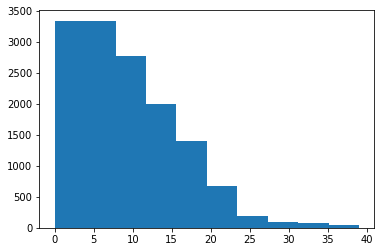

In [113]:
plt.hist(df['secondary labels'],label=df['labels'])

In [ ]:
df['new_col'] = list(zip(df['labels'], df['secondary labels']))

<IPython.core.display.Javascript object>


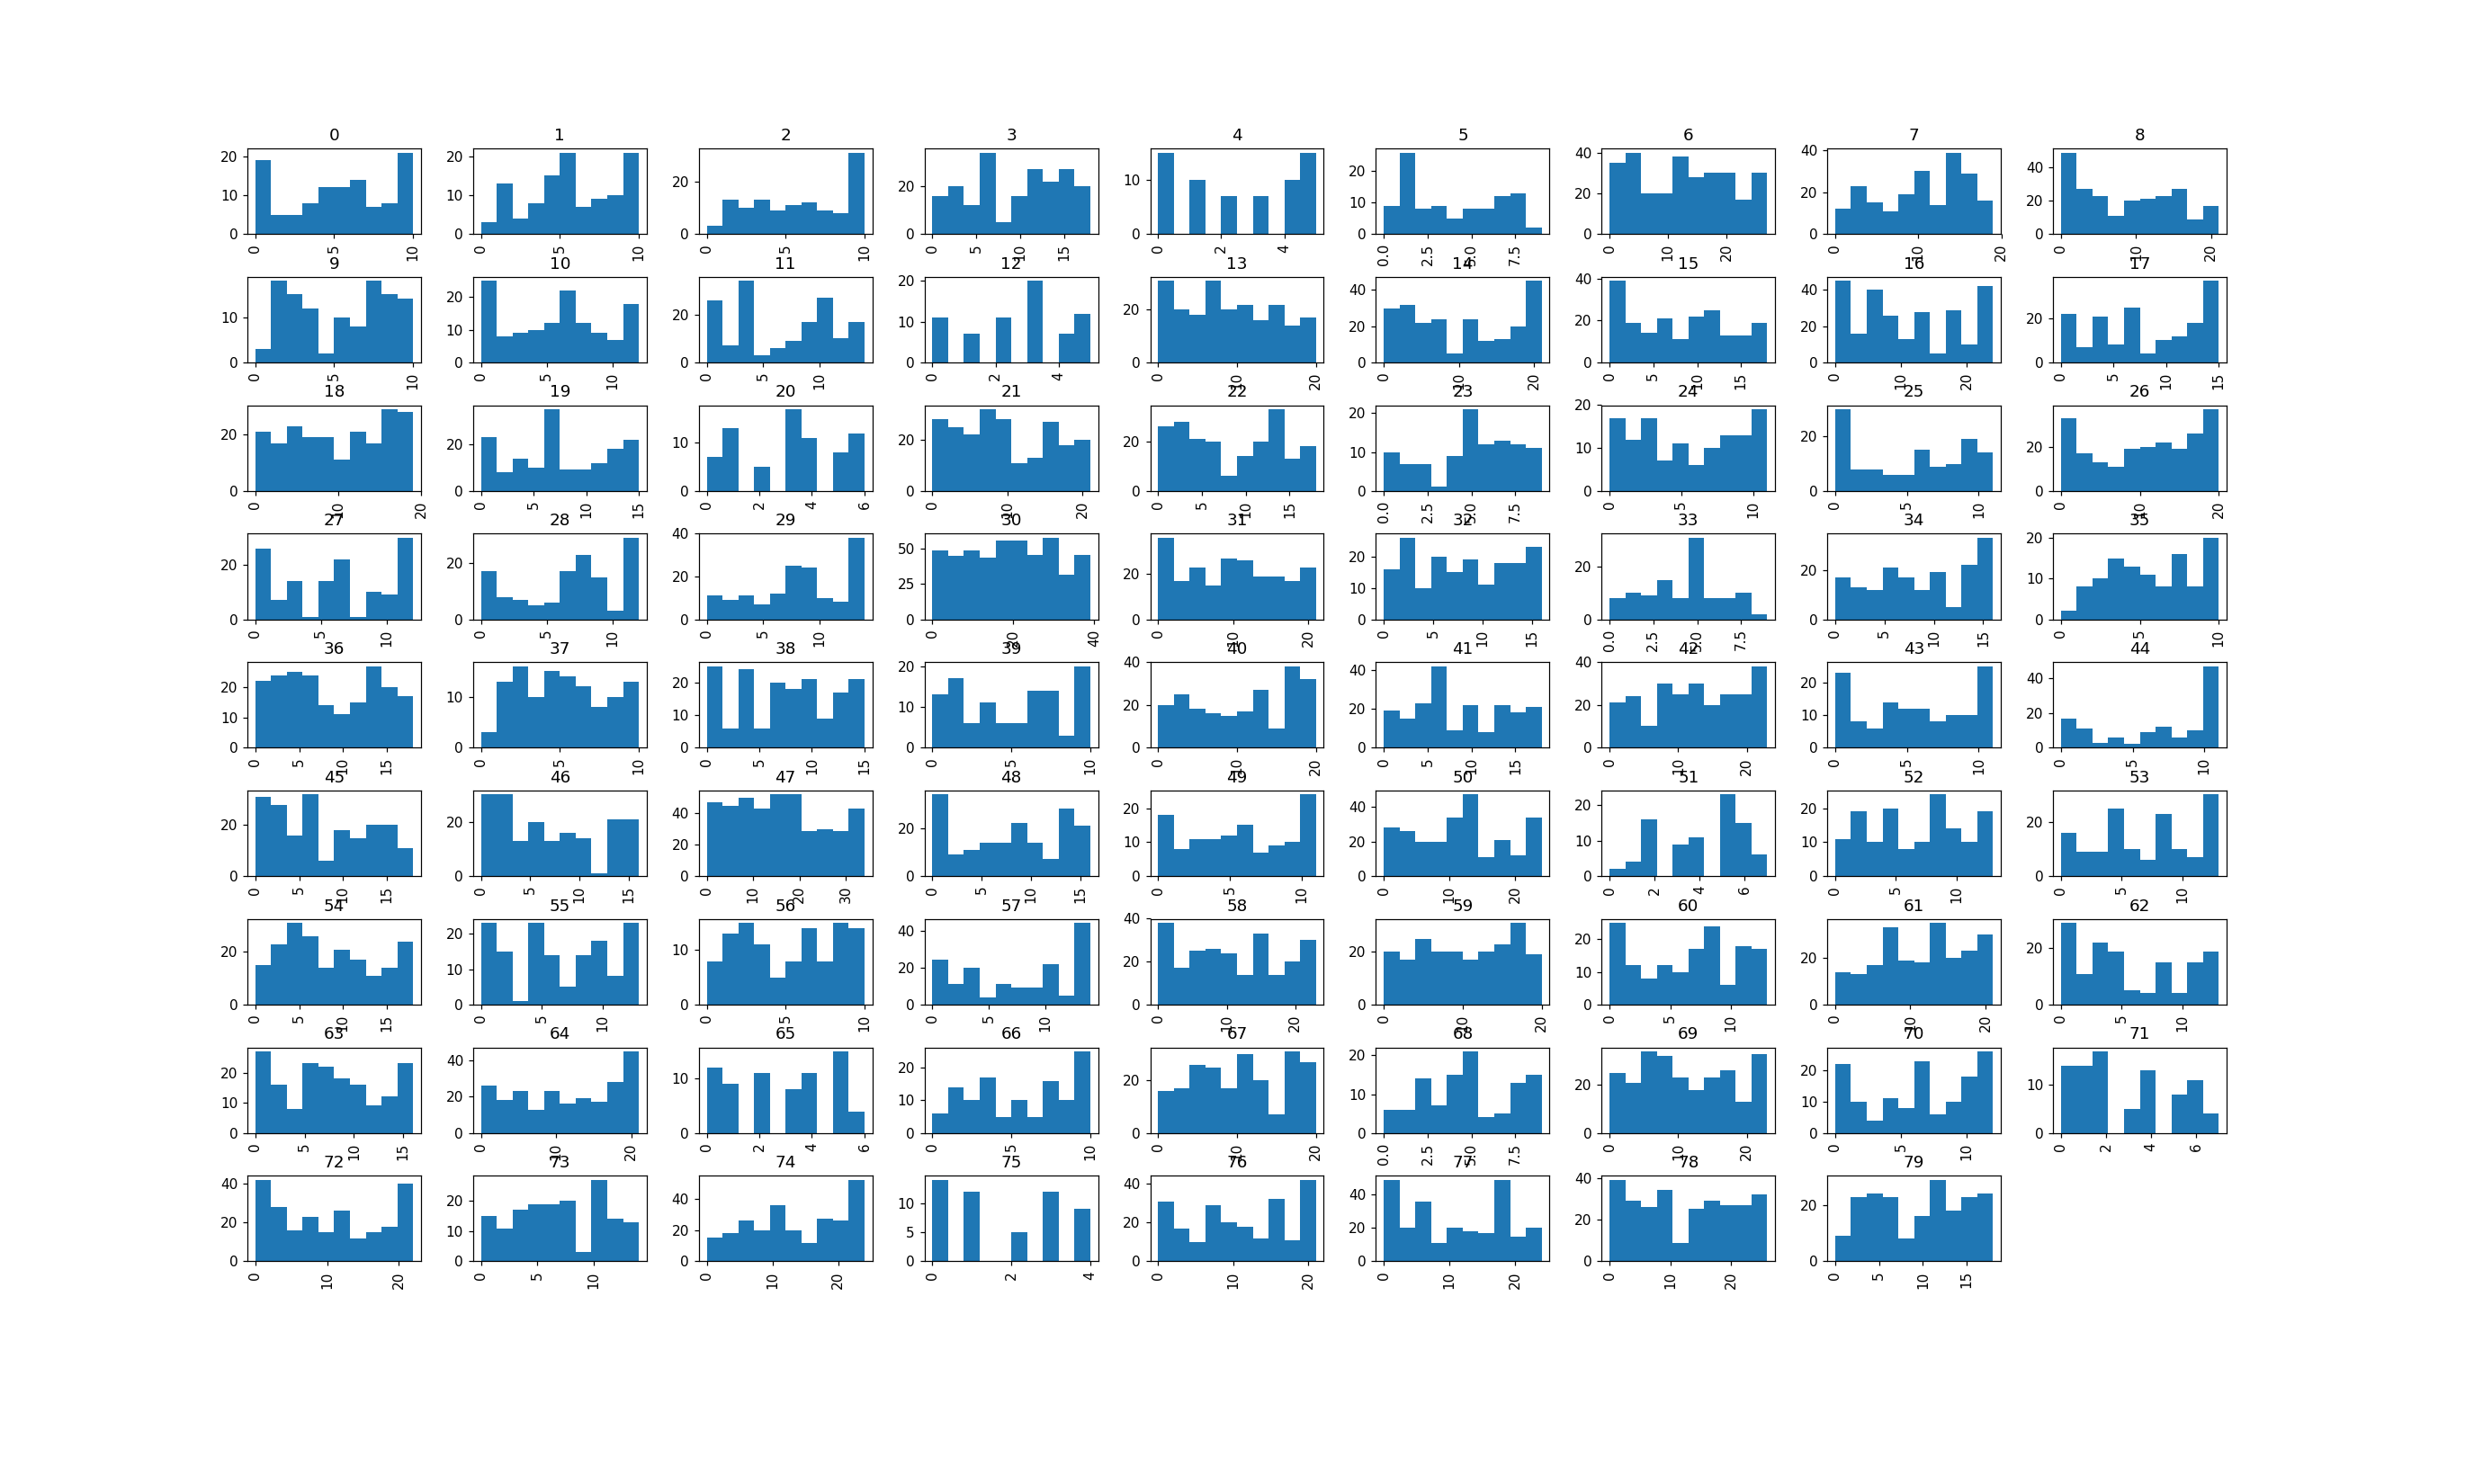

Text(0,0.5,'count')

In [9]:
plt.rcParams['figure.figsize'] = [25, 15]
#df['secondary labels'].hist(by=df['labels'])
df.hist(column='secondary labels',by='labels')
plt.xlabel('second clustering')
plt.ylabel('count')

In [13]:
df.groupby(['labels','secondary labels'])['secondary labels'].count()

labels  secondary labels
0       0                   19
        1                    5
        2                    5
        3                    8
        4                   12
        5                   12
        6                   14
        7                    7
        8                    8
        9                    8
        10                  13
1       0                    3
        1                   13
        2                    4
        3                    8
        4                   15
        5                   21
        6                    7
        7                    9
        8                   10
        9                   16
        10                   5
2       0                    3
        1                   13
        2                   10
        3                   13
        4                    9
        5                   11
        6                   12
        7                    9
                            ..
78      16    

In [15]:
import sklearn
print(sklearn.__version__)

0.19.1


In [17]:
import time
start_time = time.time()
kproto = KPrototypes(n_clusters=80,init='random')
kproto.fit(df[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
df.loc[:,'labels'] = kproto.labels_
print(kproto.cluster_centroids_)
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

TypeError: __init__() got an unexpected keyword argument 'random_state'

In [3]:
df=pd.read_csv(r'C:\Users\Anna\Desktop\MSD_final.csv')

In [4]:
df.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Artist,Name,labels,secondary labels
0,0.063000,0.751,0.073943,0.549,01TR6aAKrA2cI3Z0gnCOsu,0.000025,6,0.1060,0.740870,0.0,0.4290,0.374984,4,0.553,Casual,I Didn't Mean To,48,12
1,0.195000,0.749,0.049420,0.530,4yPl1mK1oluIrCwI4HInPR,0.000035,9,0.0748,0.697203,1.0,0.0326,0.493594,4,0.966,The Box Tops,Soul Deep,36,14
2,0.689000,0.699,0.061571,0.519,5JeyXbf7CrVQ8DqwFikN0P,0.000471,8,0.9350,0.814235,1.0,0.0290,0.416616,4,0.676,La Sonora Santanera,Amor de Cabaret (with Río Roma),23,7
3,0.197000,0.596,0.078482,0.934,1BddSZ9x0Vi2WfZOSna47Z,0.007410,0,0.1840,0.861098,1.0,0.0459,0.488146,4,0.843,Adam Ant,Something Girls,58,10
4,0.000356,0.525,0.070727,0.918,4cdbM6efK43Cs2PDMtzdhv,0.566000,2,0.0904,0.848529,1.0,0.0543,0.527472,4,0.655,Gob,Face the Ashes,32,16


In [2]:
df= pd.read_csv(r'C:\Users\Anna\Desktop\MSD_firstcluster.csv')

In [7]:
import time
for x in range(80):
    df2= df[df['labels']==x].copy()
    #df2.head()
    start_time = time.time()
    #try:
    kproto = KPrototypes(n_clusters=len(clusters_indices[x])//20,init='random')
    kproto.fit(df2[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
   # except ValueError:
        #kproto = KPrototypes(n_clusters=len(clusters_indices[x])//12,init='random')
        #kproto.fit(df2[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','valence','key','mode','time_signature']],categorical=[8,9,10])
    df.loc[df.index.isin(df2.index),'secondary labels'] = kproto.labels_
    end_time = time.time()
    print("Cluster "+ str(x))

NameError: name 'clusters_indices' is not defined

In [11]:
df.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Artist,Name,labels
0,0.063000,0.751,0.073943,0.549,01TR6aAKrA2cI3Z0gnCOsu,0.000025,6,0.1060,0.740870,0.0,0.4290,0.374984,4,0.553,Casual,I Didn't Mean To,48
1,0.195000,0.749,0.049420,0.530,4yPl1mK1oluIrCwI4HInPR,0.000035,9,0.0748,0.697203,1.0,0.0326,0.493594,4,0.966,The Box Tops,Soul Deep,36
2,0.689000,0.699,0.061571,0.519,5JeyXbf7CrVQ8DqwFikN0P,0.000471,8,0.9350,0.814235,1.0,0.0290,0.416616,4,0.676,La Sonora Santanera,Amor de Cabaret (with Río Roma),23
3,0.197000,0.596,0.078482,0.934,1BddSZ9x0Vi2WfZOSna47Z,0.007410,0,0.1840,0.861098,1.0,0.0459,0.488146,4,0.843,Adam Ant,Something Girls,58
4,0.000356,0.525,0.070727,0.918,4cdbM6efK43Cs2PDMtzdhv,0.566000,2,0.0904,0.848529,1.0,0.0543,0.527472,4,0.655,Gob,Face the Ashes,32


In [3]:
df=df.drop('labels',axis=1)

In [18]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.2.4


In [19]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

In [23]:
encoded = to_categorical(df['key'])
inverted = argmax(encoded[0])
encoded[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
pd.get_dummies(data=df, columns=['key', 'mode','time_signature'])

,acousticness,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,speechiness,tempo,...,key_9,key_10,key_11,mode_0.0,mode_1.0,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.063000,0.751,0.073943,0.54900,01TR6aAKrA2cI3Z0gnCOsu,0.000025,0.1060,0.740870,0.4290,0.374984,...,0,0,0,1,0,0,0,0,1,0
1,0.195000,0.749,0.049420,0.53000,4yPl1mK1oluIrCwI4HInPR,0.000035,0.0748,0.697203,0.0326,0.493594,...,1,0,0,0,1,0,0,0,1,0
2,0.689000,0.699,0.061571,0.51900,5JeyXbf7CrVQ8DqwFikN0P,0.000471,0.9350,0.814235,0.0290,0.416616,...,0,0,0,0,1,0,0,0,1,0
3,0.197000,0.596,0.078482,0.93400,1BddSZ9x0Vi2WfZOSna47Z,0.007410,0.1840,0.861098,0.0459,0.488146,...,0,0,0,0,1,0,0,0,1,0
4,0.000356,0.525,0.070727,0.91800,4cdbM6efK43Cs2PDMtzdhv,0.566000,0.0904,0.848529,0.0543,0.527472,...,0,0,0,0,1,0,0,0,1,0
5,0.706000,0.456,0.090726,0.47200,7ERvcsBBYzSHqQQqlI9xAN,0.000005,0.0833,0.780012,0.0325,0.600002,...,0,0,0,0,1,0,0,0,1,0
6,0.813000,0.677,0.037424,0.18300,0e4hF4Jxyh7cuwB2pMYhBh,0.000000,0.2600,0.641200,0.9260,0.356431,...,0,0,0,0,1,0,0,0,1,0
7,0.553000,0.498,0.063822,0.30000,6dfppQDZQ4x3fCs6N89kV3,0.000116,0.0963,0.737135,0.0352,0.407882,...,0,0,0,0,1,0,0,1,0,0
8,0.001990,0.292,0.091498,0.84700,2dISPmbjb4RKXTORd3KBVp,0.002390,0.0802,0.831095,0.1250,0.348279,...,1,0,0,0,1,0,0,0,1,0
9,0.000055,0.458,0.073934,0.57000,0V4226EebEIXSC55naxLmf,0.000768,0.0988,0.765091,0.0495,0.596115,...,0,0,0,1,0,0,0,0,1,0


In [4]:
df2 = pd.get_dummies(data=df, columns=['key', 'mode','time_signature'])

In [5]:
df2.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'id',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'Artist', 'Name', 'key_0', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'mode_0.0', 'mode_1.0', 'time_signature_0',
       'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=1000,random_state=23,init='random')
df2['kmean_cluster']=km.fit_predict(df2[['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','speechiness','tempo','valence','key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10','key_11', 'mode_0.0', 'mode_1.0', 'time_signature_0','time_signature_1', 'time_signature_3', 'time_signature_4','time_signature_5']])

In [7]:
df2.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,speechiness,tempo,...,key_10,key_11,mode_0.0,mode_1.0,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,kmean_cluster
0,0.063000,0.751,0.073943,0.549,01TR6aAKrA2cI3Z0gnCOsu,0.000025,0.1060,0.740870,0.4290,0.374984,...,0,0,1,0,0,0,0,1,0,871
1,0.195000,0.749,0.049420,0.530,4yPl1mK1oluIrCwI4HInPR,0.000035,0.0748,0.697203,0.0326,0.493594,...,0,0,0,1,0,0,0,1,0,275
2,0.689000,0.699,0.061571,0.519,5JeyXbf7CrVQ8DqwFikN0P,0.000471,0.9350,0.814235,0.0290,0.416616,...,0,0,0,1,0,0,0,1,0,818
3,0.197000,0.596,0.078482,0.934,1BddSZ9x0Vi2WfZOSna47Z,0.007410,0.1840,0.861098,0.0459,0.488146,...,0,0,0,1,0,0,0,1,0,719
4,0.000356,0.525,0.070727,0.918,4cdbM6efK43Cs2PDMtzdhv,0.566000,0.0904,0.848529,0.0543,0.527472,...,0,0,0,1,0,0,0,1,0,385


In [31]:
df2['kmean_cluster'].value_counts()


313    42
446    42
357    40
757    40
673    39
803    38
786    38
462    38
796    37
342    37
324    37
716    36
19     36
999    35
490    35
646    34
935    34
855    34
543    34
915    33
433    33
307    32
343    32
780    32
922    32
649    32
908    31
519    31
719    31
668    30
       ..
619     3
150     3
46      3
34      3
688     3
511     3
82      3
660     3
679     3
496     3
812     2
909     2
109     2
90      2
352     2
849     2
763     2
928     2
373     2
721     2
67      2
55      1
308     1
297     1
569     1
591     1
596     1
609     1
643     1
666     1
Name: kmean_cluster, Length: 1000, dtype: int64

In [10]:
df2.to_csv(r'C:\Users\Anna\Desktop\MSDkmeans.csv',index=False)

In [11]:
df2['kmean_cluster'].value_counts().describe()


count    1000.000000
mean       13.908000
std         7.460777
min         1.000000
25%         9.000000
50%        13.000000
75%        18.000000
max        42.000000
Name: kmean_cluster, dtype: float64

In [12]:
df2.dtypes

acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
id                   object
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
Artist               object
Name                 object
key_0                 uint8
key_1                 uint8
key_2                 uint8
key_3                 uint8
key_4                 uint8
key_5                 uint8
key_6                 uint8
key_7                 uint8
key_8                 uint8
key_9                 uint8
key_10                uint8
key_11                uint8
mode_0.0              uint8
mode_1.0              uint8
time_signature_0      uint8
time_signature_1      uint8
time_signature_3      uint8
time_signature_4      uint8
time_signature_5      uint8
kmean_cluster         int32
dtype: object

In [145]:
vc = df2['kmean_cluster'].value_counts()
toosmall=vc[vc<5].index
print(toosmall)
len(toosmall)

Int64Index([334, 278, 494, 202, 546, 293,  59, 650, 962, 996,  79, 732, 779,
            795, 444, 832, 499, 709, 752,  76, 411, 495, 537, 539, 388, 549,
            135,   1, 869, 428, 731, 466, 244, 981, 422, 635, 201, 919, 289,
            361, 885, 975, 939, 300, 325,  58, 868, 619, 150,  46,  34, 688,
            511,  82, 660, 679, 496, 812, 909, 109,  90, 352, 849, 763, 928,
            373, 721,  67,  55, 308, 297, 569, 591, 596, 609, 643, 666],
           dtype='int64')


77

In [25]:
small = df2.loc[df2['kmean_cluster'].isin(toosmall)]
master = df2[df2.columns.difference(['id','Name','Artist','kmean_cluster'])]

In [32]:
master.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key_0,key_1,key_10,key_11,key_2,...,mode_0.0,mode_1.0,speechiness,tempo,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,valence
0,0.063000,0.751,0.073943,0.549,0.000025,0,0,0,0,0,...,1,0,0.4290,0.374984,0,0,0,1,0,0.553
1,0.195000,0.749,0.049420,0.530,0.000035,0,0,0,0,0,...,0,1,0.0326,0.493594,0,0,0,1,0,0.966
2,0.689000,0.699,0.061571,0.519,0.000471,0,0,0,0,0,...,0,1,0.0290,0.416616,0,0,0,1,0,0.676
3,0.197000,0.596,0.078482,0.934,0.007410,1,0,0,0,0,...,0,1,0.0459,0.488146,0,0,0,1,0,0.843
4,0.000356,0.525,0.070727,0.918,0.566000,0,0,0,0,1,...,0,1,0.0543,0.527472,0,0,0,1,0,0.655


In [34]:
songs = list(small.index)
print(songs)

[43, 44, 61, 72, 181, 232, 270, 308, 315, 463, 529, 551, 587, 604, 640, 680, 692, 861, 884, 899, 911, 968, 985, 991, 1010, 1078, 1095, 1116, 1117, 1285, 1287, 1304, 1358, 1377, 1378, 1472, 1566, 1603, 1638, 1690, 1792, 1850, 1959, 1960, 2035, 2140, 2178, 2290, 2357, 2362, 2370, 2527, 2531, 2562, 2564, 2578, 2594, 2624, 2686, 2799, 2813, 2842, 2881, 2895, 3153, 3185, 3193, 3210, 3335, 3403, 3464, 3507, 3631, 3683, 3717, 3742, 3826, 3990, 4089, 4097, 4227, 4324, 4400, 4421, 4483, 4638, 4731, 4746, 4849, 4909, 5023, 5084, 5320, 5382, 5409, 5434, 5462, 5785, 5939, 5950, 6117, 6237, 6264, 6286, 6322, 6329, 6338, 6634, 6646, 6689, 6761, 6801, 6856, 6917, 6927, 6964, 7309, 7313, 7368, 7387, 7413, 7425, 7452, 7528, 7579, 7668, 7691, 7791, 7868, 8155, 8185, 8214, 8296, 8303, 8579, 8689, 8733, 8804, 8852, 8868, 8886, 8981, 9006, 9102, 9107, 9123, 9220, 9324, 9413, 9416, 9479, 9526, 9562, 9566, 9710, 9749, 9768, 9773, 9857, 9898, 9992, 10006, 10128, 10205, 10237, 10279, 10328, 10354, 10398, 10416

In [33]:
master.dtypes

acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key_0                 uint8
key_1                 uint8
key_10                uint8
key_11                uint8
key_2                 uint8
key_3                 uint8
key_4                 uint8
key_5                 uint8
key_6                 uint8
key_7                 uint8
key_8                 uint8
key_9                 uint8
liveness            float64
loudness            float64
mode_0.0              uint8
mode_1.0              uint8
speechiness         float64
tempo               float64
time_signature_0      uint8
time_signature_1      uint8
time_signature_3      uint8
time_signature_4      uint8
time_signature_5      uint8
valence             float64
dtype: object

In [49]:
import time

start_time = time.time()
distances = []
for row in range(len(master)): 
        #print(master.loc[each])
        #print(master.iloc[row])
    distances.append(distance.euclidean(master.iloc[43],master.iloc[row]))
end_time = time.time()
print("Elapsed time was %g seconds" % (end_time - start_time))

Elapsed time was 4.20676 seconds


In [50]:
from scipy.spatial import distance
newdf = pd.DataFrame()
for each in songs:
    start_time = time.time()
    distances = []
    for row in range(len(master)):
        #print(master.loc[each])
        #print(master.iloc[row])
        distances.append(distance.euclidean(master.loc[each],master.iloc[row]))
    newdf[each]=distances
    end_time = time.time()
    print("Elapsed time was %g seconds" % (end_time - start_time))
print(newdf.head())

Elapsed time was 4.53206 seconds
Elapsed time was 4.47102 seconds
Elapsed time was 4.45709 seconds
Elapsed time was 4.4142 seconds
Elapsed time was 4.38329 seconds
Elapsed time was 4.3863 seconds
Elapsed time was 4.45606 seconds
Elapsed time was 4.40622 seconds
Elapsed time was 4.44914 seconds
Elapsed time was 4.42814 seconds
Elapsed time was 4.44512 seconds
Elapsed time was 4.4132 seconds
Elapsed time was 4.50097 seconds
Elapsed time was 4.42121 seconds
Elapsed time was 4.4142 seconds
Elapsed time was 4.36533 seconds
Elapsed time was 4.45008 seconds
Elapsed time was 4.43617 seconds
Elapsed time was 4.45609 seconds
Elapsed time was 4.56178 seconds
Elapsed time was 4.47208 seconds
Elapsed time was 4.37228 seconds
Elapsed time was 4.45509 seconds
Elapsed time was 4.39329 seconds
Elapsed time was 4.37029 seconds
Elapsed time was 4.43116 seconds
Elapsed time was 4.40226 seconds
Elapsed time was 4.41319 seconds
Elapsed time was 4.38927 seconds
Elapsed time was 4.40619 seconds
Elapsed time w

In [76]:
#newdf=newdf.reset_index
newdf 
#newdf.sort_values(by=['43'])
#newdf=newdf.drop('index',axis=1)

,43,44,61,72,181,232,270,308,315,463,...,13540,13596,13618,13648,13682,13690,13718,13842,13878,13899
0,2.167174,2.115918,2.251973,2.364924,2.648891,2.462953,2.067588,2.263940,2.134781,2.378889,...,1.924593,2.202226,1.862825,2.401160,1.749170,2.221982,1.654894,1.533959,2.905893,2.088675
1,1.759433,1.484175,1.805070,1.543547,2.148891,2.014867,1.524730,1.980158,1.466540,2.136700,...,2.433695,1.616666,2.791713,2.898934,2.266146,2.695337,2.215076,2.111699,2.633139,1.529626
2,0.992017,1.659095,1.502826,1.858187,2.344665,1.990346,1.664950,1.790125,1.834116,1.844469,...,2.450050,1.504538,2.906229,2.788000,2.152590,2.835212,2.375534,2.253442,2.592943,1.669886
3,1.686271,1.428271,1.766870,1.900844,2.196067,2.093080,1.451237,1.990072,1.542504,2.031524,...,2.505267,0.726872,2.731019,2.770636,2.169858,2.616355,2.117457,2.062737,2.512652,1.438433
4,1.794090,1.584084,1.236853,1.952257,2.131165,1.956229,1.577851,1.556327,1.652263,2.137138,...,2.516201,1.759129,2.541274,2.775885,2.263023,2.488847,2.136812,2.139802,2.322881,1.577953
5,1.565166,1.672631,1.651372,1.858405,2.255163,1.745358,1.681096,1.812610,1.710888,1.824383,...,2.137658,1.787046,2.729475,2.791655,2.380570,2.672005,2.191981,2.127041,2.438502,1.622786
6,1.783750,1.892484,1.906193,2.089628,2.371413,1.962279,1.884069,1.567141,1.925552,1.760927,...,2.408921,1.910844,3.008459,3.075236,2.553590,2.949947,2.534939,2.285812,2.379140,1.868144
7,2.137377,2.229202,2.162326,2.381014,1.122040,2.255949,2.208360,2.286410,2.248733,1.870801,...,2.538028,2.291856,2.325726,2.751271,2.769074,2.671770,2.636960,2.597462,2.420066,2.182067
8,1.726988,1.545645,1.770458,1.169500,2.296500,2.117143,1.527552,1.963364,1.641578,2.004290,...,2.398174,1.719964,2.649001,2.637421,2.220487,2.547165,2.056688,2.094994,2.379808,1.516363
9,2.208885,2.166633,2.207948,2.291758,2.709621,2.450549,2.130090,2.397970,2.163083,2.438472,...,1.768078,2.262810,2.240549,2.273434,1.771091,2.140786,1.502149,1.566986,2.810054,2.137616


In [102]:
wow = newdf[43].sort_values()
print(wow[1:6])
list(wow[1:6].index)

9416     0.390261
8332     0.468733
1814     0.480054
5340     0.509819
12557    0.553814
Name: 43, dtype: float64


[9416, 8332, 1814, 5340, 12557]

In [116]:
wow=list(newdf[43].sort_values()[1:6].index)
print(wow)

[9416, 8332, 1814, 5340, 12557]


In [107]:
df2.loc[9416,['Artist','Name']]

Artist                      Michael Jackson
Name      Man in the Mirror - 2012 Remaster
Name: 9416, dtype: object

In [109]:
df2.loc[43,['Artist','Name']]

Artist    Perrey and Kingsley
Name          Spooks In Space
Name: 43, dtype: object

In [118]:
ff=list(zip(df2.loc[8332,['Artist','Name']]))
ff

[('Josh Martinez',), ('Another Day',)]

In [ ]:
rec = []
for i in wow:
    ff=df2.loc[i,['Artist','Name']].tolist()
    rec.append(ff)
rec

In [138]:
reco=[]
names=[]
for each in songs:
    name = df2.loc[each,'Name']
    print(name)
    names.append(name)
    relate = list(newdf[each].sort_values()[1:6].index)
    rec=[]
    for i in relate:
        ff=list(zip(df2.loc[i,['Artist','Name']]))
        rec.append(ff)
    print(rec)
    reco.append(rec)

#recommendation = dict(zip(name,rec))

Spooks In Space
[[('Michael Jackson',), ('Man in the Mirror - 2012 Remaster',)], [('Josh Martinez',), ('Another Day',)], [('Tommy Sands',), ('Sing Boy Sing',)], [('Slum Village',), ('CB4',)], [('Kutt Calhoun',), ('Hip Hop Warning',)]]
Too Much Saturn
[[('Marc Ribot y Los Cubanos',), ('Se Formo El Bochinche',)], [('Daryl Hall & John Oates',), ('Everything Your Heart Desires - 7" Version',)], [('Rick Springfield',), ('The Light of Love',)], [('Tracey Ullman',), ('You Broke My Heart in Seventeen Places',)], [('David Cassidy',), ("Darlin'",)]]
This Melody - Live
[[('Kraftwerk',), ('Autobahn - Live',)], [('Bill & Gloria Gaither',), ('Holy Ground - Homecoming Hymns Version',)], [('Vusi Mahlasela',), ('Amdokwe - Live From The Lyric Theatre, Johannesburg, South Africa/2012',)], [('The Limeliters',), ('Circles',)], [('Queensrÿche',), ('My Empty Room - Remastered 2003',)]]
Grim Prospects - Gross Prospects - Bad Trip Remix
[[('Duran Duran',), ('Rio - BBC In Concert: Live At The Manchester Apollo 

[[('Marisela',), ('Decidete - Live',)], [('Johnny Cash',), ('A Boy Named Sue - Live at San Quentin State Prison, San Quentin, CA - February 1969',)], [('Ivan Parker',), ('Close To The Well',)], [('Kalimba',), ('Al Final',)], [('Novi Fosili',), ('Bilo Mi Je Prvi Put',)]]
The Keys
[[('Enigma',), ('Back To The Rivers Of Belief: Way To Eternity / Hallelujah / The Rivers Of Belief - メドレー',)], [('Bobby Marchan',), ('It Hurts me to my Heart',)], [('The Ocean',), ('Catharsis Of A Heretic',)], [('Basil Poledouris',), ('Across The Board/End Credits',)], [('John Carpenter',), ('The Shape Returns',)]]
Backlash - Live
[[('Schizoid',), ('Grim Prospects - Gross Prospects - Bad Trip Remix',)], [('KISS',), ('Radar For Love',)], [('Duran Duran',), ('Rio - BBC In Concert: Live At The Manchester Apollo 25th April 1989',)], [('Agression',), ('Stop the Clock',)], [('Solitaire',), ('Blue Lights Flashing',)]]
Bush
[[('Opio',), ('Puppet On A String',)], [('Bounty Killer',), ('Gun Thirsty',)], [('DJ Nasty',), (

[[('The Four Preps',), ('White Lighting',)], [('George Lopez',), ('Church Hangover',)], [('Gisele MacKenzie',), ('Le Fiacre',)], [('Hans Theessink',), ('May the Road - feat.Vusa Ndlovu + cast',)], [('Bad Azz',), ('How We Get Down',)]]
It Hurts me to my Heart
[[('The Ocean',), ('Catharsis Of A Heretic',)], [('Jerry Goldsmith',), ('The Keys',)], [('Enigma',), ('Back To The Rivers Of Belief: Way To Eternity / Hallelujah / The Rivers Of Belief - メドレー',)], [('Lal Chand Yamla Jatt',), ('Subh Karaj Tera Ho Riha',)], [('Billie Holiday',), ('I Cried For You',)]]
Pic & Run
[[('Speech',), ('A Talk With Dad',)], [('The Steeles',), ('Left Behind',)], [('Ronnie Drew',), ('Seven Drunken Nights',)], [('Loop Guru',), ('The Mystery Epoch',)], [('Robin Williams',), ('Marijuana - Live',)]]
Excuse Me
[[('Frankie Howard',), ('Three Little Fishes',)], [('Peter Sellers',), ('The Trumpet Volunteer',)], [('Pierre Perret',), ('Le poulet',)], [('Ray Charles',), ("Baby Won't You Please Come Home?",)], [('Henri Pou

[[('Marc Shaiman',), ('City Slickers',)], [('Medwyn Goodall',), ('Wisdom Lives On',)], [('John Williams',), ('Old Man Rocking Chair',)], [('David Arkenstone',), ('First Kiss',)], [('Dave Eggar',), ('Dream Of Ice',)]]
Puppet On A String
[[('Neneh Cherry',), ('Manchild',)], [('Juvenile',), ('Set It Off',)], [('David Banner',), ('Bush',)], [('Ninjaman',), ('Water Come a Mi Eye',)], [('Themselves',), ('Oversleeping',)]]
Forever Again
[[('F.R. David',), ('Words',)], [('Kindred The Family Soul',), ('Look At What We Made',)], [('Clementina De Jesus',), ('Lapa',)], [('3 Doors Down',), ('Here Without You',)], [('Eurythmics',), ('Missionary Man',)]]
All Wey A Gwane
[[('Michael Jackson',), ('My Girl',)], [('Intocable',), ('Vete Ya',)], [('Banda Eddie',), ('Pode Me Chamar',)], [('Moka Only',), ('Ice Cream',)], [('Junior Boys',), ('The Equalizer',)]]
Formieren der Doppelkolonne
[[('If He Dies He Dies',), ('Dick Bill',)], [('Klimperei',), ('Danser Seule 2',)], [('N.W.A.',), ('Bonus Beats - 2002 Digi

[[('Rhian Sheehan',), ("An Afternoon On the Moon - Jet Jaguar's Remix",)], [('Paolo Mojo',), ('Que Loucura De Som (That Crazy Sound) - Original',)], [('Luke Vibert',), ('Gwithian',)], [('DJ Omega',), ('Grown & Sexy',)], [('Coburn',), ('Give Me Love (Original)',)]]
Darlin'
[[('Real Life',), ('Send Me An Angel (2009 Version)',)], [('Jon Auer',), ('Tears',)], [('Rick Springfield',), ('The Light of Love',)], [('Helen Love',), ('So Hot',)], [('Francis Dunnery',), ('Too Much Saturn',)]]
All Gone Now
[[("Princess' Lover",), ('Prends-Moi La Main',)], [('Vybz Kartel',), ('Like a Movie',)], [('Novaspace',), ('Dancing With Tears In My Eyes 2004 (Nova Mix (Club Version))',)], [('Vivid',), ('Memnon - Desire (original mix)',)], [('Soman',), ('Four Voice',)]]
Serenata
[[('Baby Dee',), ('Look What the Wind Blew In',)], [('Bill Douglas',), ('Karuna',)], [('Viktor Krauss',), ('Side Street',)], [('Jon Hassell',), ('Open Secret (Paris)',)], [('Jamiroquai',), ('World That He Wants',)]]
May the Road - feat.

[[('Alien Sex Fiend',), ('Here Cum Germs - Ravi Mix 1',)], [('Thomas Leer',), ('Glimmer',)], [('White Zombie',), ('Grease Paint And Monkey Brains',)], [('Komeda',), ('Blossom (Got To Get It Out)',)], [('A Sunny Day In Glasgow',), ('The Best Summer Ever',)]]
Fergemannen
[[('Black Flag',), ('Crass Commercialism',)], [('Tim Eriksen',), ('Friendship',)], [('Tim Wilson',), ('Uncle B.S. 1963',)], [('Mae West',), ('Little Bar Butterfly',)], [('Konstantin Wecker',), ('Fangt Mi Wirklich Koana Auf',)]]
For Ever
[[('Dif Juz',), ('Mi',)], [('Bernie Torme',), ('India',)], [('Jeckyll & Hyde',), ('Time Flies - Extended',)], [('Electribe 101',), ("Talking with Myself '98 (Canny Remix)",)], [('RSD',), ('Speeka Box',)]]
Est-ce la paix qui passe dans l'espace
[[('Maurane',), ('Juste Une Petite Fille',)], [('Julie London',), ('Easy Street',)], [('Jamiroquai',), ('World That He Wants',)], [('Kenny Burrell',), ("'Round Midnight",)], [('Sleepy John Estes',), ('Down South Blues',)]]
Fear of Flying
[[('Gene Ha

[[('Helen Love',), ('So Hot',)], [('Nichole Nordeman',), ('Do You Hear What I Hear',)], [('Die Fantastischen Vier',), ('Was wollen wir noch mehr?',)], [('David Cassidy',), ("Darlin'",)], [('Warrior King',), ('Breath Of Fresh Air',)]]


In [143]:
names

['Spooks In Space',
 'Too Much Saturn',
 'This Melody - Live',
 'Grim Prospects - Gross Prospects - Bad Trip Remix',
 'La plus bath des javas',
 'City Slickers',
 'So Hot',
 'Crass Commercialism',
 'Mira Nina',
 'Church Hangover',
 'Brother - Live at the Majestic Theatre, Brooklyn, NY - April 1996',
 'Fall Away into Darkness',
 'People of Cloud Nine',
 'Chinoiserie - Live',
 'Love Thing',
 'Position',
 'Tien An Man Dream Again',
 'He Will Lead His Children Home - Homecoming Hymns Album Version',
 'All Day',
 'Do It Nice',
 'One Hour Empire',
 'Catharsis Of A Heretic',
 'Disciplinarian',
 'Elektro Kardiogramm - Live',
 'Bridget',
 "Mrs Scott Skinner / Mackenzie Hay / The Devil's Elbow",
 'Frisch Verliebt',
 'Echo',
 'Mega Mosaico de Fruko: El Preso, El Caminante, Tania, El Ausente',
 'Gun Thirsty',
 'Jesus Hold My Hand - The Best of Homecoming Volume 1 Version',
 'Si Yo Tuviera',
 'Bubulina - En vivo',
 'Improv #1',
 'Kids In the Store',
 "An Afternoon On the Moon - Jet Jaguar's Remix",

In [ ]:
reco

In [ ]:
reco=[]
for each in songs:
    relate = list(newdf[each].sort_values()[1:6].index)
    rec=[]
    for i in relate:
        ff=list(zip(df2.loc[i,['Artist','Name']]))
        print(ff)